In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_moons

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
from sklearn.svm import LinearSVC

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [9]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

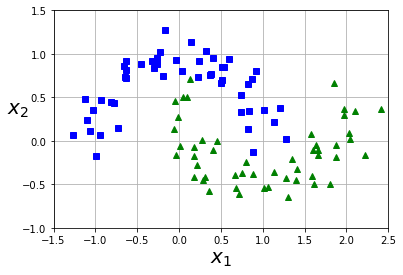

In [10]:
axes=[-1.5,2.5,-1,1.5]
plot_dataset(X, y, axes)
plt.show()

In [11]:
polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss='hinge',max_iter=10000))
])

In [12]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

In [13]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

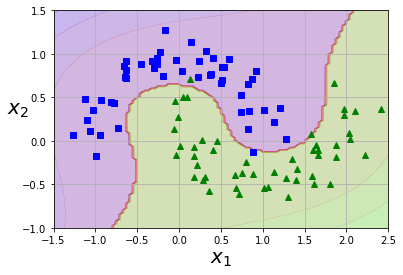

In [14]:
plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes)


In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [16]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=8, coef0=1, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=8, kernel='poly'))])

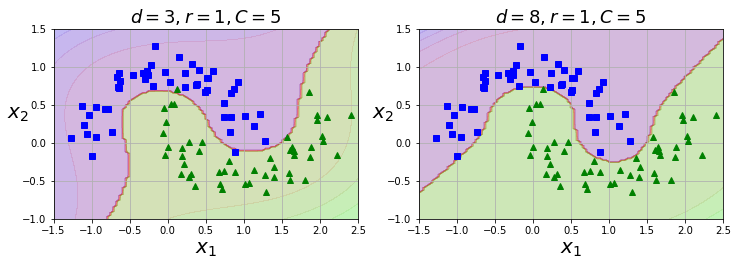

In [17]:
plt.figure(figsize=(12, 3.5))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, axes)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("$d={}, r={}, C={}$".format(
    poly_kernel_svm_clf['svm_clf'].degree,
    poly_kernel_svm_clf['svm_clf'].coef0,
    poly_kernel_svm_clf['svm_clf'].C
    ), fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, axes)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("$d={}, r={}, C={}$".format(
    poly100_kernel_svm_clf['svm_clf'].degree,
    poly100_kernel_svm_clf['svm_clf'].coef0,
    poly100_kernel_svm_clf['svm_clf'].C
    ), fontsize=18)

plt.show()